# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в программирование" </center>

# <center> Первичный анализ данных. Pandas. </center>

## Credits
[Открытый курс ODS по машинному обучению](https://github.com/Yorko/mlcourse_open) 

## Часть 1.   
  
1. Установите Anaconda (или Miniconda) и запустите Jupyter Notebook
2. Воспроизведите вычисления с семинара (файл `Explore_analysis.Pandas.ipynb`) <br>
   **Note:** Возможно, придется самостоятельно установить библиотеку seaborn. Для этого в Anaconda Prompt выполните `conda install seaborn`
3. Разберите тьюториалы [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html#min) и [Essential basic functionality](https://pandas.pydata.org/docs/user_guide/basics.html#basics).

## Часть 2. Анализ данных по доходу населения UCI Adult

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult).**

В качестве наблюдений в этом наборе данных представлены физические лица, они характеризуются различными признаками. Целевая переменная **salary** - доход человека > 50K или <= 50K.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from sklearn.neighbors import KNeighborsClassifier

# чтоб картинки рисовались в тетрадке
%matplotlib inline 

In [2]:
data = pd.read_csv('adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Определите размерность данных: сколько наблюдений и сколько признаков**

In [165]:
print(f"Количество признаков: {data.shape[1]}")
print(f"Количество наблюдений: {data.shape[0]}")

Количество признаков: 15
Количество наблюдений: 32561


**Список признаков**  
**На источнике описание признаков скудное, но названия почти у всех признаков говорящие**

In [10]:
print('\n'.join(data.columns.values.tolist()))

age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country
salary


**Проверьте, присутствуют ли в данных [пропущенные значения](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). Сколько? В каких признаках?**  
**Удалите наблюдения с пропущенными значениями**

In [21]:
df = data.copy()
df = df.replace(to_replace="?", value=np.nan)

print(f"Всего пропусков: {df.isna().sum().sum()}")
print("\nКол-во пропусков по признакам:")
print(df.isna().sum(), "\n")

# Удалим строки в которых есть NaN
df = df.dropna()

print(f"Всего пропусков: {df.isna().sum().sum()}")
print("\nКол-во пропусков по признакам:")
print(df.isna().sum(), "\n")

Всего пропусков: 4262

Кол-во пропусков по признакам:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64 

Всего пропусков: 0

Кол-во пропусков по признакам:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64 



**Для каждого признака определите, к какому типу он относится. При необходимости, приведите признак к определенному вами типу.**

In [4]:
print(f"Тип каждого признака:")
print(data.dtypes, "\n")

print("Меняем тип признака:")
df = data.astype({"race": "category"})
print(df.dtypes)

Тип каждого признака:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object 

Меняем тип признака:
age                  int64
workclass           object
fnlwgt               int64
education           object
education-num        int64
marital-status      object
occupation          object
relationship        object
race              category
sex                 object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country      object
salary              object
dtype: object


**Для категориальных признаков выведите список категорий**

In [24]:
for column in df.columns.values.tolist():
    if (str(df[column].dtype) == "object"):
        print(f"{column}:\n {df[column].unique().tolist()}\n\n")

workclass:
 ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Without-pay']


education:
 ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school', '5th-6th', '10th', 'Preschool', '12th', '1st-4th']


marital-status:
 ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']


occupation:
 ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', 'Craft-repair', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']


relationship:
 ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']


race:
 ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']


sex:
 ['Male', 'Female']


native-country:
 ['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'P

### Используя функции и методы Pandas, ответьте на вопросы:

**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [162]:
print(f"Мужчин: {data[data['sex'] == 'Male'].shape[0]}")
print(f"Женщин: {data[data['sex'] == 'Female'].shape[0]}")

Мужчин: 21790
Женщин: 10771


**2. Каков средний возраст (признак *age*) женщин?**

In [30]:
print(f"Средний возраст женщин: {data[data['sex'] == 'Female']['age'].mean()}")

Средний возраст женщин: 36.85823043357163


**3. Какова доля граждан Германии (признак *native-country*)?**

In [32]:
print("Доля(%) граждан Германии: ", end="")
print(data[data["native-country"] == "Germany"].shape[0] / data.shape[0] * 100)

Доля(%) граждан Германии: 0.42074874850281013


**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

            name  count
0      Bachelors   5355
1        HS-grad  10501
2           11th   1175
3        Masters   1723
4            9th    514
5   Some-college   7291
6     Assoc-acdm   1067
7      Assoc-voc   1382
8        7th-8th    646
9      Doctorate    413
10   Prof-school    576
11       5th-6th    333
12          10th    933
13       1st-4th    168
14     Preschool     51
15          12th    433


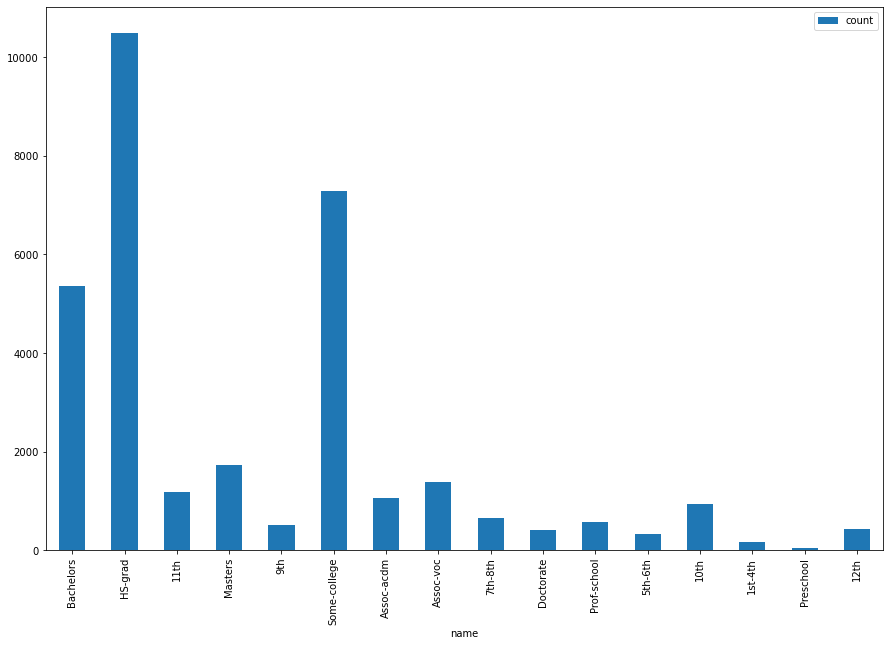

In [28]:
name_list = []
count_list = []
for education in data["education"].unique().tolist():
    name_list.append(education)
    count_list.append(data[data["education"] == education].shape[0])
    
df = pd.DataFrame({"name":name_list, "count":count_list})
print(df)
df.plot.bar(x='name', y='count', figsize=(15,10))

__5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак _salary_) и тех, кто получает менее 50K в год?__  
  
**Tip:** Используйте методы `groupby` и `agg`.

In [289]:
avg = data.groupby(["salary"]).mean()["age"].to_dict()
print(f"Средний возраст:\n\t<=50k: {avg['<=50K']}\n\t >50k: {avg['>50K']}", end="\n\n")

dev = data.groupby(["salary"]).std()["age"].to_dict()
print(f"Среднеквадратичное отклонение возраста:\n\t<=50k: {dev['<=50K']}\n\t >50k: {dev['>50K']}")

Средний возраст:
	<=50k: 36.78373786407767
	 >50k: 44.24984058155847

Среднеквадратичное отклонение возраста:
	<=50k: 14.020088490824866
	 >50k: 10.519027719851843


**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**  
  
**Tip:** Нужно написать код (может хватить и одного выражения), который проверяет выполнение условия и возвращает `True` если условие выполняется (т.е. ответ на вопрос - да, правда) и `False` иначе.

In [16]:
'1st-4th' not in data[data["salary"] == ">50K"]["education"].unique().tolist()

False

In [16]:
# Или
">=50K" == data[data["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"])]["salary"].unique()[0]

False

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**  
  
**Tip:** Максимальный возраст мужчин расы *Amer-Indian-Eskimo* необходимо получить из таблицы, полученной в результате использования методов *groupby* и *describe*. Почитайте про [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/advanced.html).

In [346]:
df = data.groupby(["sex", "race"]).max()
print("Максимальный возраст мужчин расы Amer-Indian-Eskimo:", df.loc[("Male", "Amer-Indian-Eskimo")]["age"])

Максимальный возраст мужчин расы Amer-Indian-Eskimo: 82


**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [393]:
df = data[data["salary"] == ">50K"]
print("Всего:", df.shape[0])

married = df[df["marital-status"].isin(["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"])].shape[0]
print("Married:", married)
print("Not married:", df.shape[0] - married)

Всего: 7841
Married: 6736
Not married: 1105


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [376]:
max_hours = data["hours-per-week"].max()
print("Максимальное число часов:", max_hours)
print(f"Людей, работающих {max_hours} часов:", data[data["hours-per-week"] == max_hours].shape[0])

df = data[data["hours-per-week"] == max_hours]
print("Процент зарабатывающих много:", df[df["salary"] == ">50K"].shape[0] / df.shape[0] * 100)

Максимальное число часов: 99
Людей, работающих 99 часов: 85
Процент зарабатывающих много: 29.411764705882355


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**  
  
**Tip:** Необходимо построить `barplot` для каждой страны с разбивкой по признаку *salary*. Используйте [crosstab](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html).  
Пример графика: ![](task_10_example.png)

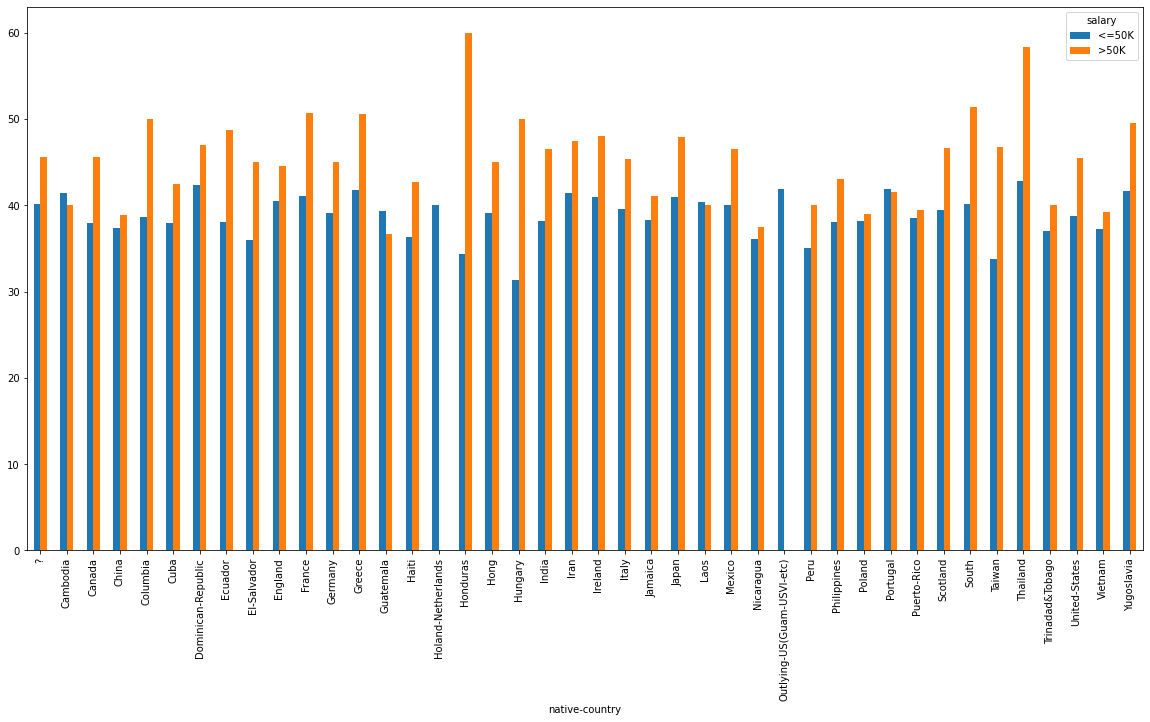

In [36]:
tab = pd.crosstab(data["native-country"], data["salary"], data["hours-per-week"], aggfunc="mean").plot.bar(figsize=(20, 10))

**Примеры форматирования**

Я считаю, что...
- Пункт 1
- Пункт 2
    - Подпункт 1
    - Подпункт 2
    
[Статья](https://arxiv.org/pdf/2011.08036.pdf)

Текст $E=mc^2$ ещё *текст* $*$

###### Заголовок